💦**Import Libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


💦**Function To Fit Model**

In [ ]:
def fit_model(x, b):
    n = len(x)
    x_bias = np.ones((n, 1))
    x = np.c_[x_bias, x]
    y_hat = x.dot(b)
    return y_hat


💦**Function To Calculate Betas Using Normal Equation**

In [ ]:

def find_betas(x, y):
    n = len(x)
    x_bias = np.ones((n, 1))
    x = np.c_[x_bias, x]
    betas = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return betas


💦**Function To Predict Y**

In [ ]:

def predict(x, betas):
    n = len(x)
    x_bias = np.ones((n, 1))
    x = np.c_[x_bias, x]
    prediction = x.dot(betas)
    return prediction


💦**Function to Calculate the coefficient of determination (R-squared)**


In [ ]:

def r_square(ssr, sst):
    return ssr / sst


💦**Function To Implement Simple Gradient Descent**

In [ ]:
def simple_gradient_descent(alpha,iterations,x,y):
    m = len(x) # data size
    b0 = 0  # initial value 
    b1 = 0  # initial value
    for i in range(iterations):
        y_hat = b0 + b1 * x 
        b0 = b0 - alpha * 1/m * sum(y_hat - y)
        b1 = b1 - alpha * 1/m * sum((y_hat - y) * x)
    return b0, b1


💦**Function To Implement General Gradient Descent**

In [ ]:

def gradient_descent(alpha, iterations, x, y):
    m = x.shape[0]  # to get number of rows
    x_bias = np.ones((m,1))   
    x = np.c_[x_bias, x]    # add bias term (b0) 
    k = x.shape[1]      # to get number of features
    betas = np.random.randn(k,1) # matrix of initial random values for betas 
    for i in range(iterations):
        betas = betas - alpha * 2/m * x.T.dot(x.dot(betas)-y)
    return betas


💦**Function To Implement Stochastic Gradient Descent**

In [ ]:
def stochastic_gradient_descent(alpha, iterations, x, y, batch_size=1):
    """
    Implements Stochastic Gradient Descent (SGD) for linear regression.
    
    Parameters:
    alpha (float): Learning rate
    iterations (int): Number of passes through the dataset
    x (ndarray): Feature matrix of shape (n_samples, n_features)
    y (ndarray): Target vector of shape (n_samples, 1)
    batch_size (int): Number of samples per batch (default: 1)
    
    Returns:
    betas (ndarray): Learned parameters
    """
    m = x.shape[0]  # Number of samples
    x_bias = np.ones((m, 1))  # Create a bias column
    x = np.c_[x_bias, x]  # Add bias term (b0) to feature matrix
    k = x.shape[1]  # Number of features (including bias)
    betas = np.random.randn(k, 1)  # Initialize betas randomly
    
    for i in range(iterations):
        indices = np.arange(m)  # Create an array of indices
        np.random.shuffle(indices)  # Shuffle data each epoch for randomness
        
        for j in range(0, m, batch_size):
            batch_indices = indices[j:j + batch_size]  # Select batch indices
            x_batch, y_batch = x[batch_indices], y[batch_indices]  # Extract batch samples
            
            # Compute gradient for the batch
            gradient = 2 / batch_size * x_batch.T.dot(x_batch.dot(betas) - y_batch)
            
            # Update parameters using the computed gradient
            betas = betas - alpha * gradient
    
    return betas


💦**Function To Implement Mini Batch Gradient Descent**

In [ ]:
def mini_batch_gradient_descent(alpha, iterations, x, y, batch_size=10):
    m = x.shape[0]  # Number of samples
    x_bias = np.ones((m, 1))  # Create a bias column
    x = np.c_[x_bias, x]  # Add bias term (b0) to feature matrix
    k = x.shape[1]  # Number of features (including bias)
    betas = np.random.randn(k, 1)  # Initialize betas randomly
    
    for i in range(iterations):
        indices = np.arange(m)  # Create an array of indices
        np.random.shuffle(indices)  # Shuffle data each epoch for randomness
        
        for j in range(0, m, batch_size):
            batch_indices = indices[j:j + batch_size]  # Select batch indices
            x_batch, y_batch = x[batch_indices], y[batch_indices]  # Extract batch samples
            
            # Compute gradient for the batch
            gradient = 2 / batch_size * x_batch.T.dot(x_batch.dot(betas) - y_batch)
            
            # Update parameters using the computed gradient
            betas = betas - alpha * gradient
    
    return betas


💦**Function To Implement Momentum Gradient Descent**

In [ ]:
def momentum_gradient_descent(alpha, iterations, x, y, batch_size=10, gamma=0.9):
   
    m = x.shape[0]  # Number of samples
    x_bias = np.ones((m, 1))  # Create a bias column
    x = np.c_[x_bias, x]  # Add bias term (b0) to feature matrix
    k = x.shape[1]  # Number of features (including bias)
    betas = np.random.randn(k, 1)  # Initialize betas randomly
    velocity = np.zeros((k, 1))  # Initialize velocity vector for momentum
    
    for i in range(iterations):
        indices = np.arange(m)  # Create an array of indices
        np.random.shuffle(indices)  # Shuffle data each epoch for randomness
        
        for j in range(0, m, batch_size):
            batch_indices = indices[j:j + batch_size]  # Select batch indices
            x_batch, y_batch = x[batch_indices], y[batch_indices]  # Extract batch samples
            
            # Compute gradient for the batch
            gradient = 2 / batch_size * x_batch.T.dot(x_batch.dot(betas) - y_batch)
            
            # Update velocity term using momentum
            velocity = gamma * velocity + alpha * gradient
            
            # Update parameters using velocity
            betas = betas - velocity
    
    return betas


💦**Create Random Data**

In [ ]:
x = np.random.randn(100)
y = 4*x + 3 + 3* np.random.randn(100)


💦**Visualize Data**

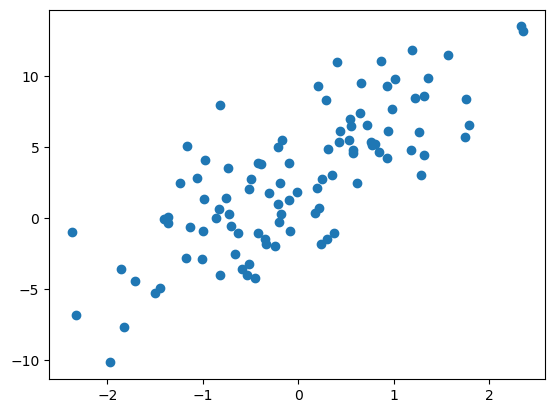

In [ ]:
plt.scatter(x,y)


💦**Calculate Betas Using Simple Gradient Descent**

In [ ]:
b0, b1 = simple_gradient_descent(alpha=.1, iterations=1000,x=x, y=y)
b0,b1


(2.8371778419562137, 3.6974831711763136)

💦**Calculating Betas Using Normal Equation To Compare Both Results**

In [ ]:
b0,b1 = find_betas(x,y)
b0,b0


(2.8371778419562155, 2.8371778419562155)

💦**Create Random Data**

In [ ]:
x = np.random.randn(100,5)
y = 15 * x + 13 + 2*np.random.randn(100,5)
y = y[0:,0:1]
y.shape


(100, 1)

💦**Calculate Betas Using General Gradient Descent**

In [ ]:
betas = gradient_descent(alpha=.1,iterations=6000,x=x,y=y)
betas


array([[12.94130948],
       [15.16096764],
       [ 0.26731529],
       [ 0.31126465],
       [ 0.21984453],
       [-0.21160609]])

💦**Calculate Betas Using Normal Equation**

In [ ]:
find_betas(x,y)


array([[12.94130948],
       [15.16096764],
       [ 0.26731529],
       [ 0.31126465],
       [ 0.21984453],
       [-0.21160609]])